# FahionNet Fashion tags

## Code

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
import tensorflow as tf
import collections
import os
import dbmanagement
import scrapping

Using TensorFlow backend.


In [3]:
import tensorflow as tf
config = tf.ConfigProto()

config.gpu_options.allow_growth = True

sess = tf.Session(config=config)

In [4]:

class_pattern = {
    0: 'Checked',
    1: 'Floral',
    2: 'Graphic',
    3: 'Plain',
    4: 'Striped'}
class_fabric = {
    0: 'Chiffon',
    1: 'Cotton',
    2: 'Crochet',
    3: 'Denim',
    4: 'Wool'}
class_color = {
    0: 'Black',
    1: 'Blue',
    2: 'Green',
    3: 'Red',
    4: 'White'}
class_style = {
    0: 'Casual',
    1: 'Formal',
    2: 'Party',
    3: 'Sports',
    4: 'Vacance'}

In [5]:
def show_sample(X):
    im = X
    plt.imshow(im)
    
    plt.axis('on')
    plt.show()

In [6]:
image_input_dir = 'scraped/'
test_datagen = ImageDataGenerator(rescale=1./255)
inpdata_generator = test_datagen.flow_from_directory(
        image_input_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,
        shuffle = False)

Found 18 images belonging to 2 classes.


In [7]:
nb_input_samples = 4
c=0
images_input=[]
for X_batch in inpdata_generator:
    c+=1
    if (c>nb_input_samples):
        break
    images_input.append(X_batch[0,:,:,:])
    

data_images_inp=np.asarray(images_input)
print (data_images_inp.shape)

(4, 150, 150, 3)


In [8]:
pattern_model = load_model('./models/vgg_weights_best_pattern.hdf5')
fabric_model = load_model('./models/vgg_weights_best_fabric.hdf5')
color_model = load_model('./models/vgg_weights_best_color.hdf5')
style_model = load_model('./models/vgg_weights_best_style.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [9]:
pattern=pattern_model.predict(data_images_inp)
fabric=fabric_model.predict(data_images_inp)
color=color_model.predict(data_images_inp)
style=style_model.predict(data_images_inp)
print ("Pattern : " , pattern.shape)
print ("fabric : " , fabric.shape)
print ("color : " , color.shape)
print ("Style : " , style.shape) 

Pattern :  (4, 5)
fabric :  (4, 5)
color :  (4, 5)
Style :  (4, 5)


 
Pattern :  Checked
Fabric :  Denim
Color :  Blue
Style :  Casual


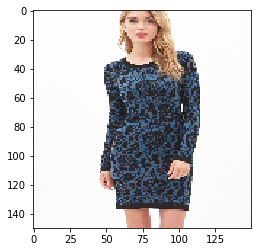

---------------------------------------------
 
Pattern :  Floral
Fabric :  Chiffon
Color :  Black
Style :  Vacance


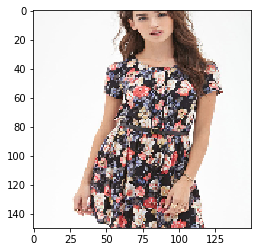

---------------------------------------------
 
Pattern :  Floral
Fabric :  Chiffon
Color :  Black
Style :  Vacance


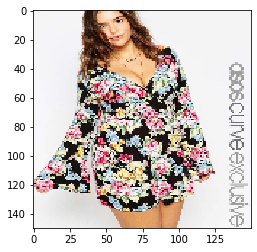

---------------------------------------------
 
Pattern :  Plain
Fabric :  Wool
Color :  Black
Style :  Formal


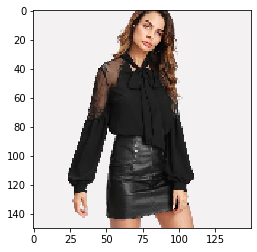

---------------------------------------------


In [10]:
for i in range(len(data_images_inp)):
    print (" ")
    print ("Pattern : " , class_pattern[np.argmax(pattern[i])])
    print ("Fabric : " , class_fabric[np.argmax(fabric[i])])
    print ("Color : " , class_color[np.argmax(color[i])])
    print ("Style : " , class_style[np.argmax(style[i])])
    show_sample(data_images_inp[i])
    print ("---------------------------------------------")